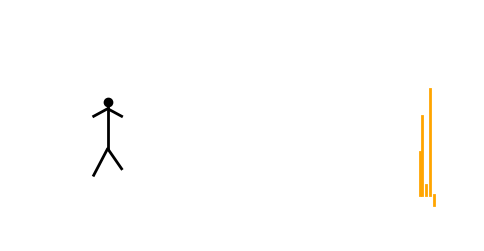

In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

fig, ax = plt.subplots(figsize=(6, 3))
ax.set_xlim(0, 10)
ax.set_ylim(0, 5)
ax.axis('off')

# Stick figure components
head, = ax.plot([], [], 'o', color='black')
body, = ax.plot([], [], '-', lw=2, color='black')
arms, = ax.plot([], [], '-', lw=2, color='black')
legs, = ax.plot([], [], '-', lw=2, color='black')

# Fire flames on the right
flames = []
for i in range(5):
    flame, = ax.plot([], [], color='orange', lw=2)
    flames.append(flame)

def init():
    for f in flames:
        f.set_data([], [])
    head.set_data([], [])
    body.set_data([], [])
    arms.set_data([], [])
    legs.set_data([], [])
    return [head, body, arms, legs] + flames

def animate(i):
    x = 8 - i * 0.1  # Move left
    y = 2

    # Stick figure parts
    head.set_data([x], [y + 1])
    body.set_data([x, x], [y, y + 1])
    arms.set_data([x - 0.3, x, x + 0.3], [y + 0.7, y + 0.8 + 0.1 * np.sin(i), y + 0.7])
    legs.set_data([x - 0.3, x, x + 0.3], [y - 0.5 + 0.1 * np.cos(i), y, y - 0.5 + 0.1 * np.sin(i)])

    # Fire flickering
    for idx, f in enumerate(flames):
        fx = 9 + 0.2 * np.sin(i + idx)
        fy = 1 + idx * 0.5 + 0.3 * np.cos(i + idx)
        f.set_data([fx, fx], [1, fy])

    return [head, body, arms, legs] + flames

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=60, interval=80, blit=True)

# Save to gif
ani.save("wildfire_stick_figure.gif", writer="pillow", fps=12)

plt.show()


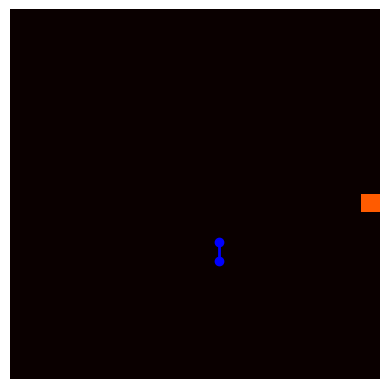

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Example: simulate a list of 2D wildfire spread arrays
# Replace this with your real 'hist' data
hist = [np.zeros((20, 20)) for _ in range(30)]
for i in range(30):
    hist[i][10, 10+i//3] = 1  # Simulated fire spread

fig, ax = plt.subplots()
im = ax.imshow(hist[0], cmap='hot', vmin=0, vmax=2)
stickman, = ax.plot([], [], 'o-', color='blue', lw=2)  # stick head and body
ax.axis('off')

def init():
    im.set_data(hist[0])
    stickman.set_data([], [])
    return [im, stickman]

def animate(i):
    im.set_data(hist[i])
    
    # Stick figure moves away from fire
    x = 5 + i * 0.2  # horizontal movement
    y = 15 - i * 0.1  # diagonal upward
    stickman.set_data([x, x], [y, y+1])  # just body (add limbs if needed)

    return [im, stickman]

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=len(hist), interval=200, blit=True)
ani.save("wildfire_sim_with_runner.gif", writer="pillow")
plt.show()
